<a href="https://www.quantrocket.com"><img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png"></a>

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Researching the Momentum Factor

Momentum investing says that excess returns can be generated by buying recent winners and selling recent losers. In this notebook we will research the momentum factor on our universe of demo stocks. This will help us determine whether we have a profitable idea before turning to a full backtest.  

First, load your historical data into pandas.

In [1]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free", start_date="2017-01-01", fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4  FIBBG000BFWKC0  FIBBG000BKZB36  \
Field Date                                                         
Close 2017-01-03        110.6912        102.3847        124.1493   
      2017-01-04        110.5673        102.6583        125.2493   
      2017-01-05        111.1296        102.8146        123.7703   
      2017-01-06        112.3685        105.6682        123.4283   
      2017-01-09        113.3977        106.4695        124.1493   

Sid               FIBBG000BMHYD1  FIBBG000BPH459  FIBBG000GZQ728  \
Field Date                                                         
Close 2017-01-03        106.2337         59.1333         79.8180   
      2017-01-04        106.0594         58.8687         78.9398   
      2017-01-05        107.1691         58.8687         77.7630   
      2017-01-06        106.6555         59.3790         77.7191   
      2017-01-09        106.6372         59.1900         76.4370   

Sid               FIBBG00B3T3HD3  
Field Date                        
Close 2017-01-03           28.83  
      2017-01-04           30.26  
      2017-01-05           30.65  
      2017-01-06           30.68  
      2017-01-09           29.48

Next, we use closing prices to calculate our momentum factor. We calculate momentum using a twelve-month window but excluding the most recent month, as commonly recommended by academic papers. 

In [2]:
closes = prices.loc["Close"]

MOMENTUM_WINDOW = 252 # 12 months = 252 trading days
RANKING_PERIOD_GAP = 22 # 1 month = 22 trading days
earlier_closes = closes.shift(MOMENTUM_WINDOW)
later_closes = closes.shift(RANKING_PERIOD_GAP)
momentum_returns = (later_closes - earlier_closes) / earlier_closes

Now that we have the twelve-month returns, we calculate the next day returns:

In [3]:
next_day_returns = closes.pct_change().shift(-1)

To see if the twelve-month returns predict next-day returns, we will split the twelve-month returns into bins and look at the mean next-day return of each bin. To do this, we first need to stack our wide-form DataFrames into Series. 

In [4]:
momentum_returns = momentum_returns.stack(dropna=False)
next_day_returns = next_day_returns.stack(dropna=False)

Use pandas' `qcut` function to create the bins: 

In [5]:
import pandas as pd

# For a very small demo universe, you might only want 2 quantiles 
num_bins = 2
bins = pd.qcut(momentum_returns, num_bins)

Now group the next day returns by momentum bin and plot the mean return:

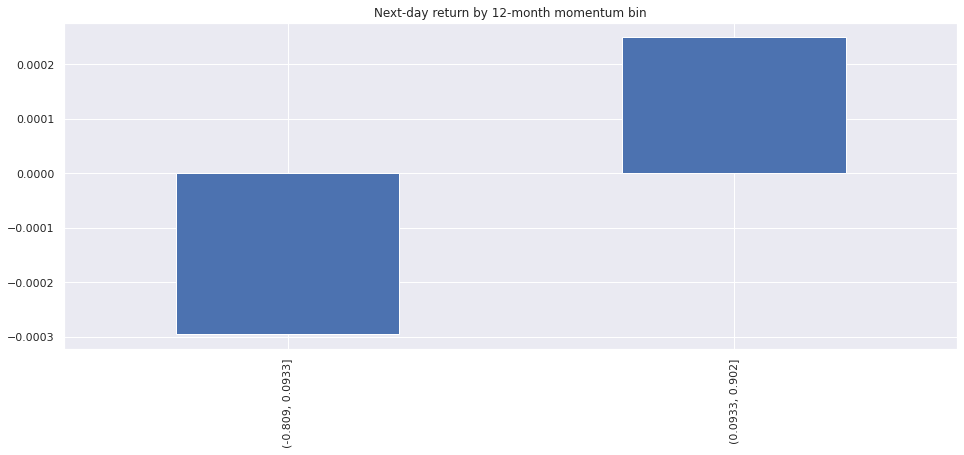

In [6]:
next_day_returns.groupby(bins).mean().plot(kind="bar", title="Next-day return by 12-month momentum bin")

For a predictive factor, the higher quantiles should perform better than the lower quantiles.

***

## *Next Up*

Part 4: [Moonshot Strategy Code](Part4-Moonshot-Strategy-Code.ipynb)